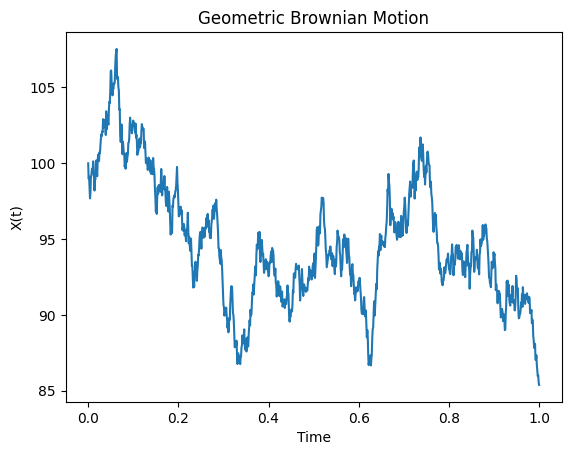

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mu = 0.1      # Drift
sigma = 0.2   # Volatility
X0 = 100      # Initial value
T = 1         # Time horizon
N = 1000      # Number of steps
dt = T / N    # Time step

# Initialize
t = np.linspace(0, T, N+1)
X = np.zeros(N+1)
X[0] = X0

# Simulate
for i in range(N):
    dW = np.random.normal(0, np.sqrt(dt))  # Brownian increment
    X[i+1] = X[i] + mu * X[i] * dt + sigma * X[i] * dW

# Plot
plt.plot(t, X)
plt.xlabel('Time')
plt.ylabel('X(t)')
plt.title('Geometric Brownian Motion')
plt.show()

# 1. Euler-Maruyama

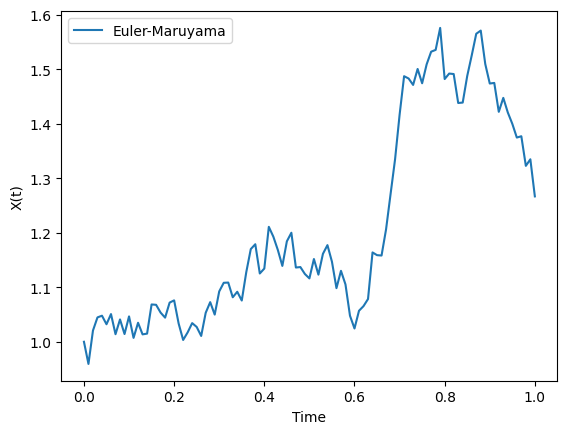

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def euler_maruyama(f, g, X0, T, dt):
    N = int(T / dt)
    X = np.zeros(N + 1)
    t = np.linspace(0, T, N + 1)
    X[0] = X0

    for i in range(N):
        dW = np.sqrt(dt) * np.random.randn()
        X[i+1] = X[i] + f(X[i], t[i]) * dt + g(X[i], t[i]) * dW

    return t, X

# Define drift and diffusion functions
f = lambda x, t: 0.1 * x  # Example drift function
g = lambda x, t: 0.3 * x  # Example diffusion function

# Run simulation
T, dt, X0 = 1.0, 0.01, 1.0
t, X = euler_maruyama(f, g, X0, T, dt)

# Plot result
plt.plot(t, X, label="Euler-Maruyama")
plt.xlabel("Time")
plt.ylabel("X(t)")
plt.legend()
plt.show()


# 2. Milstein method

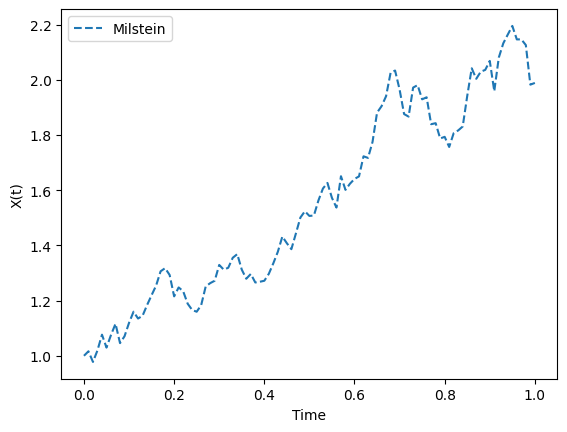

In [8]:
def milstein(f, g, X0, T, dt):
    N = int(T / dt)
    X = np.zeros(N + 1)
    t = np.linspace(0, T, N + 1)
    X[0] = X0

    for i in range(N):
        dW = np.sqrt(dt) * np.random.randn()
        g_prime = (g(X[i] + 1e-5, t[i]) - g(X[i], t[i])) / 1e-5  # Numerical derivative
        X[i+1] = X[i] + f(X[i], t[i]) * dt + g(X[i], t[i]) * dW + 0.5 * g(X[i], t[i]) * g_prime * (dW**2 - dt)

    return t, X

# Run simulation
t, X = milstein(f, g, X0, T, dt)

# Plot result
plt.plot(t, X, label="Milstein", linestyle="--")
plt.xlabel("Time")
plt.ylabel("X(t)")
plt.legend()
plt.show()


# 3. runge kutta

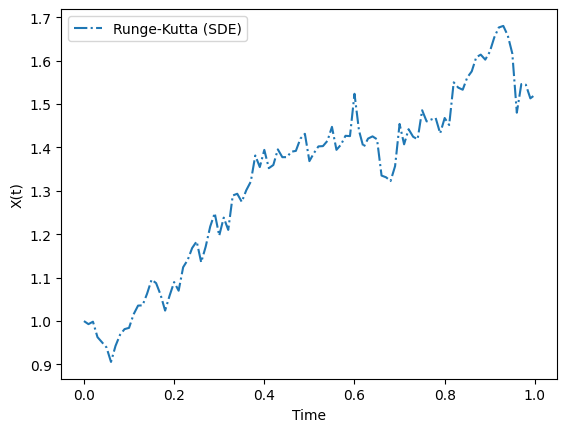

In [9]:
def runge_kutta_sde(f, g, X0, T, dt):
    N = int(T / dt)
    X = np.zeros(N + 1)
    t = np.linspace(0, T, N + 1)
    X[0] = X0

    for i in range(N):
        dW = np.sqrt(dt) * np.random.randn()
        K1 = f(X[i], t[i]) * dt + g(X[i], t[i]) * dW
        K2 = f(X[i] + K1, t[i] + dt) * dt + g(X[i] + K1, t[i] + dt) * dW
        X[i+1] = X[i] + 0.5 * (K1 + K2)

    return t, X

# Run simulation
t, X = runge_kutta_sde(f, g, X0, T, dt)

# Plot result
plt.plot(t, X, label="Runge-Kutta (SDE)", linestyle="-.")
plt.xlabel("Time")
plt.ylabel("X(t)")
plt.legend()
plt.show()


# 4. Implicite Euler Method

C:\Users\Tsien\AppData\Local\Temp\ipykernel_5684\1267962114.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X[i+1] = fsolve(F, X[i])  # Solve for X_next


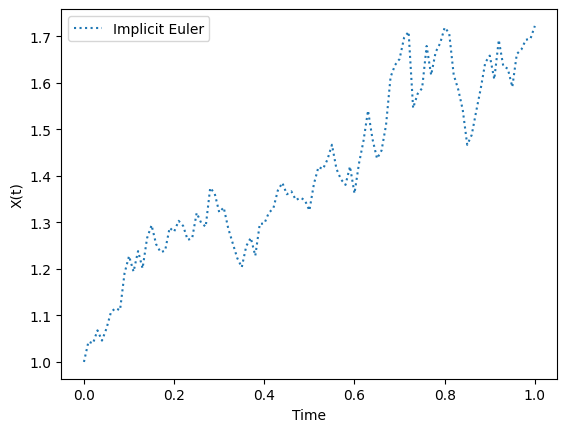

In [10]:
from scipy.optimize import fsolve

def implicit_euler(f, g, X0, T, dt):
    N = int(T / dt)
    X = np.zeros(N + 1)
    t = np.linspace(0, T, N + 1)
    X[0] = X0

    for i in range(N):
        dW = np.sqrt(dt) * np.random.randn()
        def F(X_next):  # Implicit equation
            return X_next - X[i] - f(X_next, t[i] + dt) * dt - g(X[i], t[i]) * dW
        X[i+1] = fsolve(F, X[i])  # Solve for X_next

    return t, X

# Run simulation
t, X = implicit_euler(f, g, X0, T, dt)

# Plot result
plt.plot(t, X, label="Implicit Euler", linestyle=":")
plt.xlabel("Time")
plt.ylabel("X(t)")
plt.legend()
plt.show()
